In [58]:
from matplotlib import pyplot as plt
from plotly import express as px
import pandas as pd

## Line Drawing Algos

### 1. Digital Differential Analyzer

In [59]:
def DDA(xi: float, yi: float, xf: float, yf: float) -> list:
    dx = xf - xi
    dy = yf - yi
    points = []
    
    steps = max(abs(dx), abs(dy))
    print(steps)
    
    xinc = dx/steps
    yinc = dy/steps
    
    x = xi
    y = yi
    
    for _ in range (steps + 1):
        # depending upon the round off accurecy changes
        # acoording to notes, round off to an integer
        points.append((round(x, 0), round(y, 0)))
        x += xinc
        y += yinc
    
    print(points)
    return points

In [60]:
x1, y1 = 5, 6
x2, y2 = 8, 12

line_points = DDA(x1, y1, x2, y2)
df = pd.DataFrame(line_points, columns=['X', 'Y'])

6
[(5, 6), (6.0, 7.0), (6.0, 8.0), (6.0, 9.0), (7.0, 10.0), (8.0, 11.0), (8.0, 12.0)]


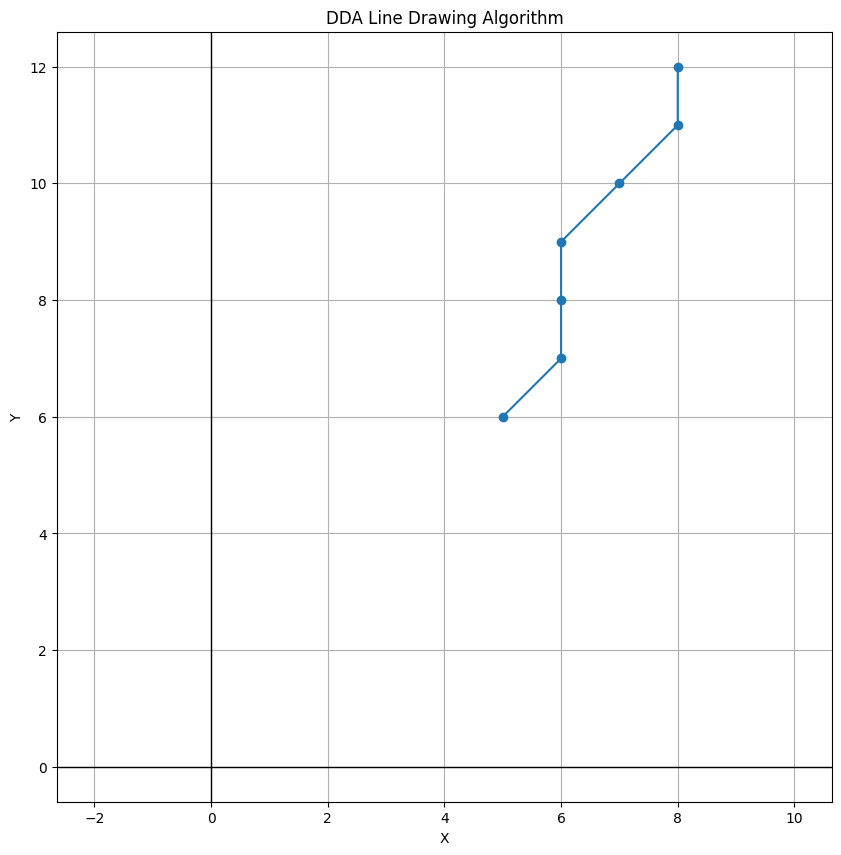

In [61]:
# plot
plt.figure(figsize=(10, 10))
plt.plot([p[0] for p in line_points], [p[1] for p in line_points], marker='o')
plt.title('DDA Line Drawing Algorithm')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axis('equal')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.ion()
plt.show()

### 2. Bresenham Algo

In [63]:
def BresenhamLine(xi, yi, xf, yf):
    dx = xf - xi
    dy = yf - yi
    points = []
    d_values = []

    d = 2 * dy - dx

    y = yi
    for x in range (xi, xf + 1):
        points.append((x, y))
        d_values.append(d)
        
        if d < 0:
            d += 2 * dy
        else:
            d += 2 * (dy - dx)
            y += 1
    
    print(points, "\n", d_values)
    return points
        

In [64]:
x1, y1 = 20, 10
x2, y2 = 30, 18

line_points = BresenhamLine(x1, y1, x2, y2)
df = pd.DataFrame(line_points, columns=['X', 'Y'])

[(20, 10), (21, 11), (22, 12), (23, 12), (24, 13), (25, 14), (26, 15), (27, 16), (28, 16), (29, 17), (30, 18)] 
 [6, 2, -2, 14, 10, 6, 2, -2, 14, 10, 6]


In [65]:
# interactive plot
fig = px.line(df, x='X', y='Y', title='Bresenham Line', markers='o')
fig.show()

### 3. Mid Point LDA

In [66]:
def midPointLDA(x0, y0, xn, yn):
    dx = xn - x0
    dy = yn - y0
    points = []

    d = 2 * dy - dx

    y = y0
    for x in range (x0, xn + 1):
        points.append((x, y))
        
        if d < 0:
            d += 2 * dy
        else:
            d += 2 * (dy - dx)
            y += 1
    
    print(points)
    return points
        

## Circle

### 1. Midpoint CDA

In [78]:
def plotPoints(xc, yc, points):
    pts = []
    # oct 1
    for p in range(0, len(points)):
        pts.append([xc + points[p][0], yc + points[p][1]])

    # oct 2
    for p in range(len(points) - 1, -1, -1):
        pts.append([xc + points[p][1], yc + points[p][0]])

    # oct 3
    for p in range(0, len(points)):
        pts.append([xc + points[p][1], yc - points[p][0]])
        
    # oct 4
    for p in range(len(points) - 1, -1, -1):
        pts.append([xc + points[p][0], yc - points[p][1]])

    # oct 5
    for p in range(0, len(points)):
        pts.append([xc - points[p][0], yc - points[p][1]])

    # oct 6
    for p in range(len(points) - 1, -1, -1):
        pts.append([xc - points[p][1], yc - points[p][0]])

    # oct 7
    for p in range(0, len(points)):
        pts.append([xc - points[p][1], yc + points[p][0]])
        
    # oct 8
    for p in range(len(points) - 1, -1, -1):
        pts.append([xc - points[p][0], yc + points[p][1]])

    return pts

def midPointCDA(x_center, y_center, radius):
    x = 0
    y = radius
    points_xy = []
    
    d = 1 - radius
    
    points_xy.append((x, y))
    
    while x <= y :
        # points_xy.append((x, y))
        # x += 1
        
        if d < 0:
            d += 2 * x + 1
        else:
            y -= 1
            d += 2 * (x - y) + 1
        
        x += 1
        points_xy.append((x, y))
            
    points = plotPoints(x_center, y_center, points_xy)
    
    size = len(points)
    i = 0
    for p in points:
        print(p, end=" ")
        i += 1
        
        if i % (size / 8) == 0:
            print()
    return points

In [79]:
points = midPointCDA(4, -4, 10)

df = pd.DataFrame(points, columns=['X', 'Y'])

[4, 6] [5, 6] [6, 6] [7, 6] [8, 5] [9, 5] [10, 5] [11, 4] [12, 3] 
[11, 4] [12, 3] [13, 2] [13, 1] [13, 0] [14, -1] [14, -2] [14, -3] [14, -4] 
[14, -4] [14, -5] [14, -6] [14, -7] [13, -8] [13, -9] [13, -10] [12, -11] [11, -12] 
[12, -11] [11, -12] [10, -13] [9, -13] [8, -13] [7, -14] [6, -14] [5, -14] [4, -14] 
[4, -14] [3, -14] [2, -14] [1, -14] [0, -13] [-1, -13] [-2, -13] [-3, -12] [-4, -11] 
[-3, -12] [-4, -11] [-5, -10] [-5, -9] [-5, -8] [-6, -7] [-6, -6] [-6, -5] [-6, -4] 
[-6, -4] [-6, -3] [-6, -2] [-6, -1] [-5, 0] [-5, 1] [-5, 2] [-4, 3] [-3, 4] 
[-4, 3] [-3, 4] [-2, 5] [-1, 5] [0, 5] [1, 6] [2, 6] [3, 6] [4, 6] 


In [80]:
# interactive plot
fig = px.line(df, x='X', y='Y', title='Mid Point Circle', markers='o')
fig.show()

### 2. Bresenham CDA

In [75]:
def plotPoints(xc, yc, points):
    pts = []
    # oct 1
    for p in range(0, len(points)):
        pts.append([xc + points[p][0], yc + points[p][1]])

    # oct 2
    for p in range(len(points) - 1, -1, -1):
        pts.append([xc + points[p][1], yc + points[p][0]])

    # oct 3
    for p in range(0, len(points)):
        pts.append([xc + points[p][1], yc - points[p][0]])
        
    # oct 4
    for p in range(len(points) - 1, -1, -1):
        pts.append([xc + points[p][0], yc - points[p][1]])

    # oct 5
    for p in range(0, len(points)):
        pts.append([xc - points[p][0], yc - points[p][1]])

    # oct 6
    for p in range(len(points) - 1, -1, -1):
        pts.append([xc - points[p][1], yc - points[p][0]])

    # oct 7
    for p in range(0, len(points)):
        pts.append([xc - points[p][1], yc + points[p][0]])
        
    # oct 8
    for p in range(len(points) - 1, -1, -1):
        pts.append([xc - points[p][0], yc + points[p][1]])

    return pts

def BresenhamCDA(x_center, y_center, radius):
    x = 0
    y = radius
    points_xy = []
    
    d = 3 - 2 * radius
    
    points_xy.append((x, y))
    while x <= y:
        # points_xy.append((x, y))
        # x += 1
        
        if d < 0:
            d += 4 * x + 6
        else:
            y -= 1
            d += 4 * (x - y) + 10
        x += 1
        points_xy.append((x, y))
            
    points = plotPoints(x_center, y_center, points_xy)
    
    size = len(points)
    i = 0
    for p in points:
        print(p, end=" ")
        i += 1
        
        if i % (size / 8) == 0:
            print()
    return points

In [76]:
points = BresenhamCDA(4, -4, 10)

df = pd.DataFrame(points, columns=['X', 'Y'])

[4, 6] [5, 6] [6, 6] [7, 6] [8, 5] [9, 5] [10, 4] [11, 3] [12, 2] 
[10, 4] [11, 3] [12, 2] [13, 1] [13, 0] [14, -1] [14, -2] [14, -3] [14, -4] 
[14, -4] [14, -5] [14, -6] [14, -7] [13, -8] [13, -9] [12, -10] [11, -11] [10, -12] 
[12, -10] [11, -11] [10, -12] [9, -13] [8, -13] [7, -14] [6, -14] [5, -14] [4, -14] 
[4, -14] [3, -14] [2, -14] [1, -14] [0, -13] [-1, -13] [-2, -12] [-3, -11] [-4, -10] 
[-2, -12] [-3, -11] [-4, -10] [-5, -9] [-5, -8] [-6, -7] [-6, -6] [-6, -5] [-6, -4] 
[-6, -4] [-6, -3] [-6, -2] [-6, -1] [-5, 0] [-5, 1] [-4, 2] [-3, 3] [-2, 4] 
[-4, 2] [-3, 3] [-2, 4] [-1, 5] [0, 5] [1, 6] [2, 6] [3, 6] [4, 6] 


In [77]:
# interactive plot
fig = px.line(df, x='X', y='Y', title='Bresenham Circle', markers='o')
fig.show()